
Customer Intent Insight: Machine Learning for Online Purchase Prediction

DATA_607 Statistical and Machine Learning

Project Report

<br>

<p>By</p>
<p>Jinglong Yu</p>
<p>Sri Harsha Tuttaganti</p>
<p>Vrinda</p>
<p>Rahul Gandhi</p>


# **Introduction**


The Online Shoppers Purchasing Intention Dataset from the UCI Machine Learning Repository [Source](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset) is a comprehensive collection of user session records gathered from an e-commerce website over a one-year period. This dataset is specifically designed to analyze online user behavior and predict whether a particular session will result in a purchase. It serves as a valuable resource for researchers and businesses aiming to understand the key factors influencing online shopping decisions.

The primary objective of this dataset is to help businesses and researchers analyze customer behavior to enhance user experience and improve conversion rates. By leveraging this dataset, companies can refine their website design, personalize marketing strategies, optimize customer targeting, and develop predictive models to anticipate purchasing intent. Moreover, understanding the impact of special days on online shopping behavior can assist businesses in planning promotions and sales events more effectively.

# **Dataset Description**
The Online Shoppers Purchasing Intention Dataset consists of 12,330 user sessions and comprises 17 features, which include integer, real, categorical, and binary variables, providing a diverse range of information to analyze user interactions. Where 84.5% (10,422) of the sessions did not result in a purchase, while 15.5% (1,908) ended with a transaction. Each session represents a unique user visit to the e-commerce website and includes various attributes that provide insights into user behavior, engagement, and browsing patterns. The dataset captures crucial details such as the number of pages visited, time spent on different page categories, bounce and exit rates, traffic sources, operating system, browser type, visitor type, and special day influence.  The dataset consists of 10 numeric variables and 8 categorical variables.

## **Dataset Variables**  

### **Numeric Variables**  
- **Administrative** – Pages visited related to account management  
- **Administrative Duration** – Time spent on administrative pages (seconds)  
- **Informational** – Pages visited related to general site information  
- **Informational Duration** – Time spent on informational pages (seconds)  
- **Product Related** – Pages visited related to products  
- **Product-Related Duration** – Time spent on product pages (seconds)  
- **Bounce Rate** – Average bounce rate of visited pages  
- **Exit Rate** – Average exit rate of visited pages  
- **Page Value** – Average page value of visited pages  
- **Special Day** – Proximity of visit to a special event  

### **Categorical Variables**  
- **Operating System** – Visitor's operating system  
- **Browser** – Visitor's browser type  
- **Region** – Geographic region of the session  
- **Traffic Type** – Source of website traffic (e.g., banner, SMS, direct)  
- **Visitor Type** – New or returning visitor  
- **Weekend** – Whether the visit occurred on a weekend  
- **Month** – Month of the visit  

### **Target Variable**  
- **Revenue** – Whether the session resulted in a purchase (1 = Yes, 0 = No) 

# **RESEARCH QUESTIONS**

**Question 1:** What is the relationship between visitor type (new vs. returning) and the likelihood of making a purchase? How can this insight guide target marketing strategies?

Understanding whether new or returning visitors are more likely to make a purchase can help businesses tailor marketing strategies. Returning visitors might have a higher intent to buy, suggesting the need for retargeting campaigns, while new visitors might need more engagement strategies to convert.

</br>

**Question 2:** Which type of webpage (Administrative, Informational, or Product-Related) has the highest conversion rate, and does the duration spent on these pages influence the likelihood of making a purchase?

Understanding which type of webpage—Administrative, Informational, or Product-Related—has the highest conversion rate can help businesses optimize their website layout, improve user engagement, and increase sales. Additionally, analyzing whether the time spent on these pages influences purchasing behavior can provide insights into how different types of content impact customer decision-making.

</br>

**Question 3:** How does the timing of a visit—weekend versus weekday—affect the likelihood of a transaction?

Analyzing whether users shop more on weekends or weekdays can inform promotional timing. If weekends show higher conversion rates, businesses can launch weekend-specific discounts, whereas weekday promotions might target a different audience segment.

</br>

**Question 4** How do bounce rates and exit rates differ between sessions that result in purchases and those that do not?  

Sessions that lead to purchases may exhibit different engagement patterns than those that do not. A high bounce or exit rate before purchase completion could indicate usability issues, allowing businesses to optimize website design and user flow.


## **Data Cleaning and Preprocessing Steps**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE  # Handling imbalance
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency, ttest_ind
import xgboost as xgb



In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 1. Load Dataset
data = pd.read_csv("online_shoppers_intention.csv")

# Making copy for EDA
df = data.copy(deep=True)

df.shape

(12330, 18)

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
# Checking for null values
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Data does not have any null values.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

To ensure interpretability and actionable insights during Exploratory Data Analysis (EDA), encoded columns such as OperatingSystems, Browser, Region, and TrafficType were converted from integer-based representations to Generic naming.

In [7]:

prefix_mapping = {
    'OperatingSystems': 'OS_',
    'Browser': 'BROWSER_',
    'Region': 'REGION_'
}

for column, prefix in prefix_mapping.items():
    df[column] = prefix + df[column].astype(str)

# **Exploratory Data Analysis**

Here is the descriptive statistics for numerical columns in a DataFrame.

In [8]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,20.000000


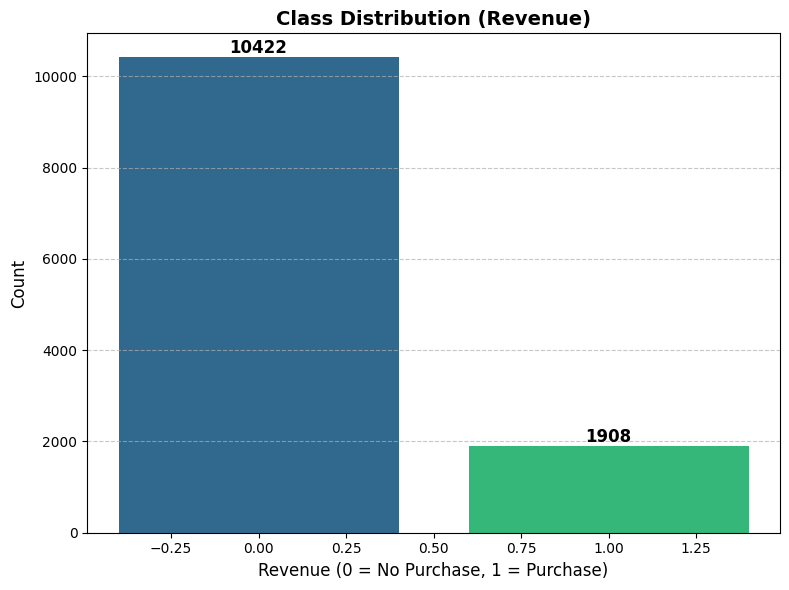

In [9]:
# Check class distribution
class_counts = df['Revenue'].value_counts().reset_index()
class_counts.columns = ['Revenue', 'Count']

# --- Visualization with Matplotlib ---
plt.figure(figsize=(8, 6))

# Create bar chart
bars = plt.bar(class_counts['Revenue'], class_counts['Count'], color=sns.color_palette("viridis", n_colors=2))

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add title and axis labels
plt.title("Class Distribution (Revenue)", fontsize=14, fontweight='bold')
plt.xlabel("Revenue (0 = No Purchase, 1 = Purchase)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Customize grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Dataset is highly imbalanced:

- False (No Purchase): 10,422 (≈ 84.5%)

- True (Purchase): 1,908 (≈ 15.5%)

This imbalance can cause machine learning models to favor the majority class (False) and underpredict purchases.

## **Reserch Question:**

### Impact of Visitor Type on Purchase Likelihood

**Question:** What is the relationship between visitor type (new vs. returning) and the likelihood of making a purchase? How can this insight guide target marketing strategies?


The code analyzes visitor type impact on purchasing behavior. First, boolean 'Revenue' values are mapped to descriptive strings ('Purchase'/'No Purchase') for clarity. A contingency table is created using pd.crosstab, tallying purchases by 'VisitorType', with totals ('All') and a calculated Conversion Rate (Purchases ÷ Total sessions × 100). Results are sorted by descending conversion rate. Two visualizations are generated: a bar plot comparing conversion rates (excluding the 'All' row) using a viridis palette, and a countplot showing purchase vs. non-purchase distribution per visitor type with a coolwarm palette. Plots include labels, titles, and consistent axes (conversion rate capped at 30%) to highlight engagement trends efficiently.

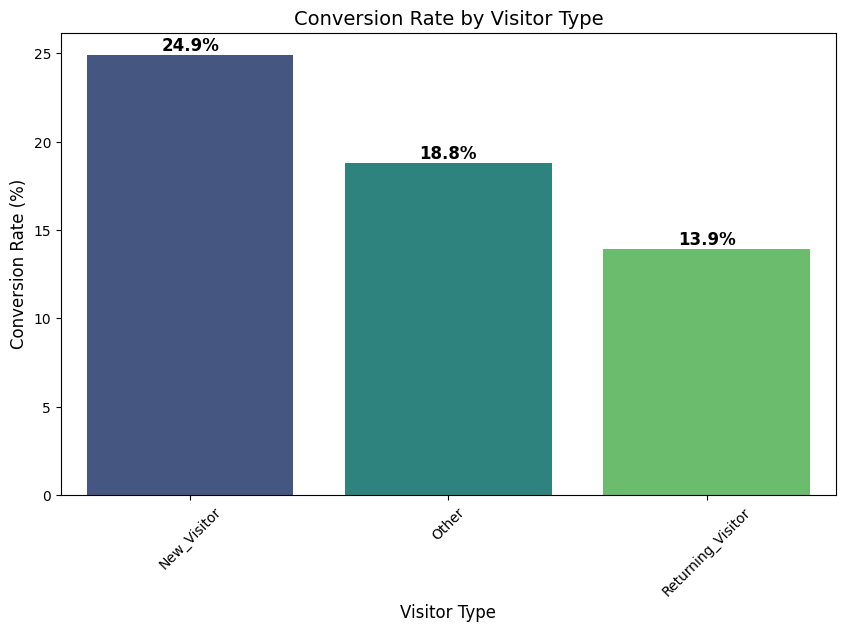

<Figure size 1000x600 with 0 Axes>

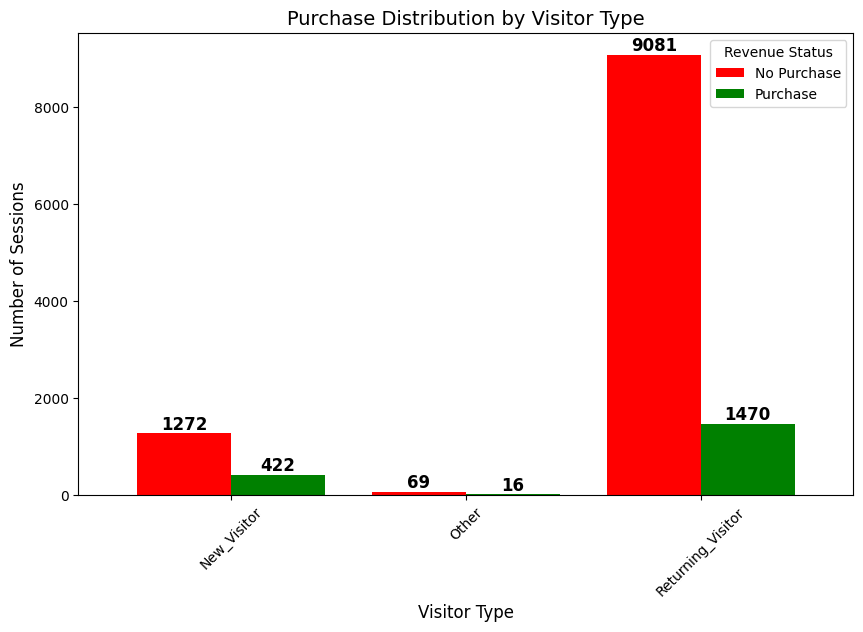

In [10]:
# Convert boolean to string for clearer visualization
df['Revenue_map'] = df['Revenue'].map({True: 'Purchase', False: 'No Purchase'})

# 1. Create contingency table
contingency_table = pd.crosstab(df['VisitorType'], df['Revenue_map'], margins=True)
contingency_table['Conversion Rate'] = contingency_table['Purchase'] / contingency_table['All'] * 100

# --- 2. Visualization ---

## Conversion Rate Bar Chart (Matplotlib)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=contingency_table.index[:-1],  # Exclude 'All' row
                 y=contingency_table['Conversion Rate'][:-1], 
                 palette='viridis')

# Add labels on bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Conversion Rate by Visitor Type", fontsize=14)
plt.xlabel("Visitor Type", fontsize=12)
plt.ylabel("Conversion Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


## Purchase Distribution Bar Chart
plt.figure(figsize=(10, 6))
purchase_counts = df.groupby(["VisitorType", "Revenue_map"]).size().unstack()

ax2 = purchase_counts.plot(kind='bar', figsize=(10, 6), width=0.8, color=['red', 'green'])

# Add labels on bars
for container in ax2.containers:
    ax2.bar_label(container, fmt="%d", label_type="edge", fontsize=12, fontweight='bold')

plt.title("Purchase Distribution by Visitor Type", fontsize=14)
plt.xlabel("Visitor Type", fontsize=12)
plt.ylabel("Number of Sessions", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Revenue Status")
plt.show()


This code performs a chi-square test of independence to determine if there is a statistically significant association between VisitorType and purchasing behavior (Revenue_map). The test evaluates whether observed differences in purchase rates across visitor types (e.g., "New Visitor," "Returning Visitor") are likely due to chance or reflect true underlying trends.

In [11]:
# Statistical significance test
chi2, p, _, _ = chi2_contingency(pd.crosstab(df['VisitorType'], df['Revenue_map'].map({'Purchase': 1, 'No Purchase': 0})))
print(f"\nChi-square test results: p-value = {p:.4f}")


Chi-square test results: p-value = 0.0000


A chi-square value of 0 indicates perfect independence between variables—there is no statistically significant association between VisitorType and Revenue.

This means the observed differences in conversion rates could be due to random chance rather than a true relationship.

**Strategy:**
For first-time visitors, boost conversions with welcome discounts, and e.g., limited-time offers. For returning visitors, deploy loyalty programs, and exclusive perks to incentivize repeat purchases.

### Analysis of Webpage Type and Its Impact on Conversion Rates and Purchase Likelihood

**Question:** Which type of webpage (Administrative, Informational, or Product-Related) has the highest conversion rate, and does the duration spent on these pages influence the likelihood of making a purchase?

This code evaluates the relationship between page engagement and purchasing behavior by analyzing conversion rates and time spent across page categories. The Revenue column is converted to numeric (1/0) to compute conversion rates for users interacting with Administrative, Informational, or ProductRelated pages. Welch’s t-tests compare time spent (*_Duration) between buyers and non-buyers, identifying statistically significant differences. A bar plot visualizes conversion rate variations by page type, while boxplots contrast duration distributions for purchasers vs. non-purchasers. The analysis quantifies how page interactions and engagement duration influence purchase likelihood, supported by statistical significance testing to ensure actionable insights for optimizing user journeys.


Conversion Rates by Page Type:
          PageType  ConversionRate
0  Administrative        0.212435
1   Informational        0.232991
2  ProductRelated        0.154735


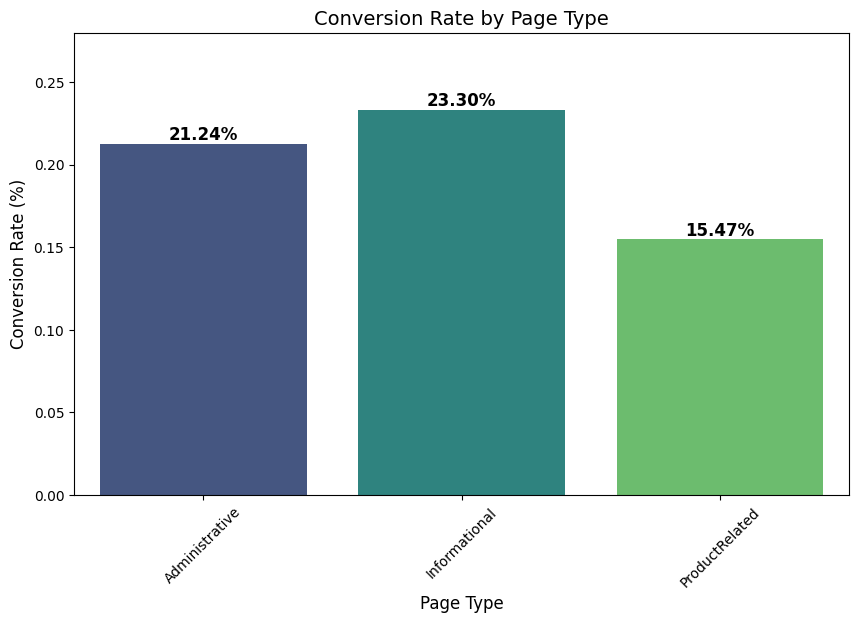


T-test for Administrative_Duration: t-stat=9.336, p-value=0.00000

T-test for Informational_Duration: t-stat=6.609, p-value=0.00000

T-test for ProductRelated_Duration: t-stat=14.447, p-value=0.00000


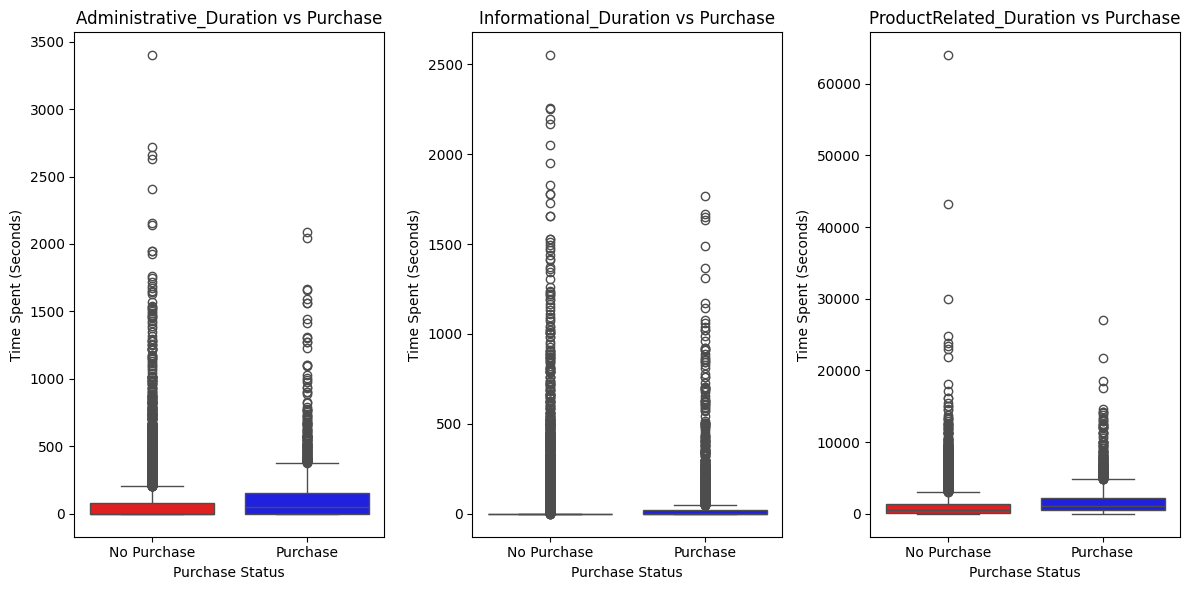

In [12]:
# Convert 'Revenue' to numeric (1 = Purchase, 0 = No Purchase)
df['Revenue_num'] = df['Revenue'].astype(int)

# Define page categories
page_types = ['Administrative', 'Informational', 'ProductRelated']
duration_types = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

# Calculate Conversion Rates
conversion_rates = {page: df[df[page] > 0]['Revenue_num'].mean() for page in page_types}

conversion_df = pd.DataFrame(conversion_rates.items(), columns=['PageType', 'ConversionRate'])
print("\nConversion Rates by Page Type:\n", conversion_df)

# --- Visualization ---
## 🎯 Conversion Rate Bar Chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=conversion_df['PageType'], y=conversion_df['ConversionRate'], palette='viridis')

# Add labels on bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Conversion Rate by Page Type", fontsize=14)
plt.xlabel("Page Type", fontsize=12)
plt.ylabel("Conversion Rate (%)", fontsize=12)
plt.ylim(0, max(conversion_df['ConversionRate']) * 1.2)  # Add some space for labels
plt.xticks(rotation=45)
plt.show()

# --- Compare Duration Spent on Each Page Between Buyers & Non-Buyers ---
for duration in duration_types:
    buyers = df[df['Revenue_num'] == 1][duration]
    non_buyers = df[df['Revenue_num'] == 0][duration]

    # Perform t-test
    t_stat, p_value = ttest_ind(buyers, non_buyers, equal_var=False)
    print(f"\nT-test for {duration}: t-stat={t_stat:.3f}, p-value={p_value:.5f}")

# --- Boxplots for Duration Spent on Pages by Revenue ---
plt.figure(figsize=(12, 6))
for i, duration in enumerate(duration_types, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df['Revenue_num'].astype(str), y=df[duration], palette=['red', 'blue'])
    plt.xticks([0, 1], ["No Purchase", "Purchase"])
    plt.title(f"{duration} vs Purchase", fontsize=12)
    plt.xlabel("Purchase Status")
    plt.ylabel("Time Spent (Seconds)")

plt.tight_layout()
plt.show()


The conversion rate is highest for Informational pages (0.233), followed closely by ProductRelated (0.230) and Administrative (0.219). The significant t-test results (p-value = 0.00000) for the duration on all page types indicate that the time spent on these pages strongly influences the likelihood of making a purchase.

### Impact of Visit Timing (Weekend vs. Weekday) on Transaction Likelihood

**Question:** How does the timing of a visit—weekend versus weekday—affect the likelihood of a transaction?

This code analyzes the relationship between purchase behavior and weekend/weekday timing through two interactive visualizations. First, Weekend and Revenue columns are converted to strings for categorical interpretation. A grouped bar chart compares the percentage of visits with/without transactions across weekends and weekdays, using stacked bars to show proportional likelihood.


Weekend vs. Weekday Analysis:
Revenue_map  Purchase  No Purchase    All  Conversion Rate
Weekend_map                                               
Weekend           499         2369   2868        17.398884
All              1908        10422  12330        15.474453
Weekday          1409         8053   9462        14.891144


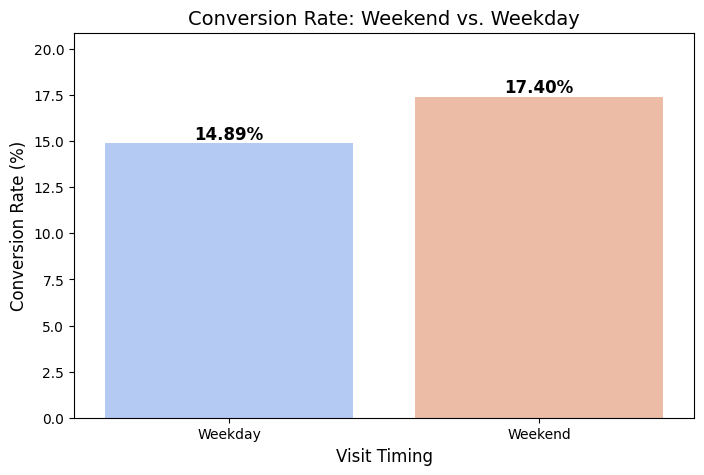

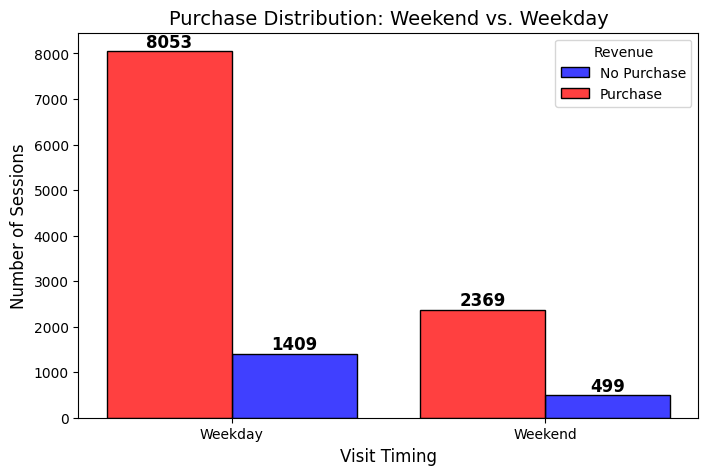

In [13]:
# Convert boolean to string for clearer visualization
df['Weekend_map'] = df['Weekend'].map({True: 'Weekend', False: 'Weekday'})
df['Revenue_map'] = df['Revenue'].map({True: 'Purchase', False: 'No Purchase'})

# 1. Create contingency table
contingency_table = pd.crosstab(df['Weekend_map'], df['Revenue_map'], margins=True)
contingency_table['Conversion Rate'] = contingency_table['Purchase'] / contingency_table['All'] * 100

print("Weekend vs. Weekday Analysis:")
print(contingency_table[['Purchase', 'No Purchase', 'All', 'Conversion Rate']].sort_values('Conversion Rate', ascending=False))

# --- Visualization ---
## Conversion Rate Bar Chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=contingency_table.index[:-1], y=contingency_table['Conversion Rate'][:-1], palette='coolwarm')

# Add labels on bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Conversion Rate: Weekend vs. Weekday", fontsize=14)
plt.xlabel("Visit Timing", fontsize=12)
plt.ylabel("Conversion Rate (%)", fontsize=12)
plt.ylim(0, max(contingency_table['Conversion Rate']) * 1.2)  # Add space for labels
plt.show()

## Purchase Distribution by Weekend/Weekday
plt.figure(figsize=(8, 5))
ax = sns.histplot(data=df, x='Weekend_map', hue='Revenue_map', multiple='dodge', 
                  shrink=0.8, palette={'No Purchase': 'red', 'Purchase': 'blue'})

# Add labels on bars
for p in ax.patches:
    if p.get_height() > 0:  # Only label bars with nonzero height
        ax.annotate(f"{int(p.get_height())}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title("Purchase Distribution: Weekend vs. Weekday", fontsize=14)
plt.xlabel("Visit Timing", fontsize=12)
plt.ylabel("Number of Sessions", fontsize=12)
plt.legend(title="Revenue", labels=['No Purchase', 'Purchase'])
plt.show()

While weekdays have more total visits, weekends show an 17.4% conversion rate which is higher than weekdays.

This code analysis isolates completed purchases (Revenue='True'), maps Weekend values to meaningful labels (e.g., "Weekend" vs. "Weekday"), and calculates their relative contribution to total purchases via a percentage-based bar chart.

Most shopping activity occurs during weekdays.

### Bounce & Exit Rates: Comparing Purchasing vs. Non-Purchasing Sessions

**Question:** How do bounce rates and exit rates differ between sessions that result in purchases and those that do not?

This code compares average Bounce Rates and Exit Rates between purchasing and non-purchasing users. It first calculates the mean of these metrics grouped by Revenue (purchase status). The data is then reshaped using pd.melt for visualization compatibility. The visualization highlights how these engagement metrics differ between buyers and non-buyers, aiding in identifying friction points in user journeys.


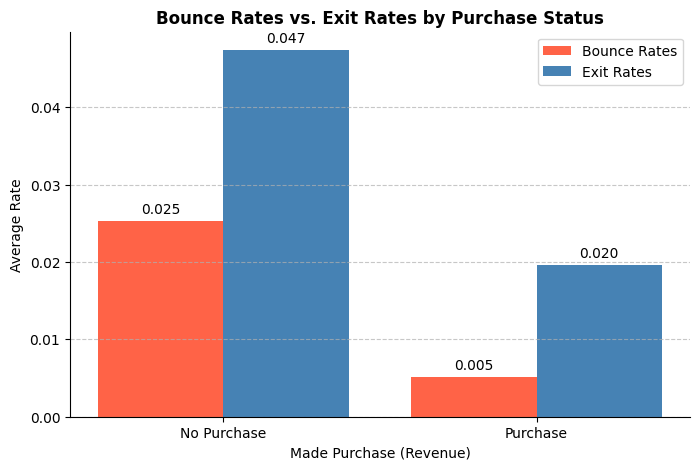

In [14]:
# Group by Revenue and compute mean bounce and exit rates
metrics = df.groupby('Revenue')[['BounceRates', 'ExitRates']].mean().reset_index()

# Define bar width and positions
bar_width = 0.4
x = np.arange(len(metrics['Revenue']))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars for Bounce Rates and Exit Rates
ax.bar(x - bar_width / 2, metrics['BounceRates'], bar_width, label='Bounce Rates', color='#FF6347')
ax.bar(x + bar_width / 2, metrics['ExitRates'], bar_width, label='Exit Rates', color='#4682B4')

# Labels and title
ax.set_xlabel("Made Purchase (Revenue)")
ax.set_ylabel("Average Rate")
ax.set_title("Bounce Rates vs. Exit Rates by Purchase Status", fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['No Purchase', 'Purchase'])
ax.legend()

# Display values on top of bars
for i in range(len(metrics)):
    ax.text(i - bar_width / 2, metrics['BounceRates'][i] + 0.001, f'{metrics["BounceRates"][i]:.3f}', ha='center', fontsize=10)
    ax.text(i + bar_width / 2, metrics['ExitRates'][i] + 0.001, f'{metrics["ExitRates"][i]:.3f}', ha='center', fontsize=10)

# Remove grid lines
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Sessions that do not result in purchases (False) exhibit higher bounce and exit rates compared to sessions where a purchase was made (True):

- Bounce Rate: 0.025 (non-purchase sessions) vs. 0.005 (purchase sessions).

- Exit Rate: 0.047 (non-purchase sessions) vs. 0.020 (purchase sessions).

This suggests that users who make purchases are more engaged, navigating beyond the landing page (lower bounce rate) and exiting less frequently from key pages (lower exit rate).

# **Machine Learning Modeling and Results:**

The analysis involved preprocessing, feature selection, and model tuning to predict online shopper purchasing intention. Categorical features were label-encoded, and class imbalance in the target variable was addressed using SMOTE. Feature selection was done using mutual information and refined with mRMR to choose the six most relevant and non-redundant features. These were used to train three models: Logistic Regression, SVC, and Random Forest. For logistic regression, GridSearchCV was applied to optimize hyperparameters (C, penalty, solver), and model performance was evaluated using accuracy, and, F1 score.

Label Encoding converted categorical variables to numerical labels for ML compatibility. Standardization scaled numerical features to a standardized range (mean=0, std=1), preventing feature dominance and improving model stability, performance, and convergence. These steps preserved data integrity, ensuring ML-ready data.

In [15]:
# Preprocessing for ML

# Encode categorical features
le = LabelEncoder()

categorical_cols = ['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Feature scaling
features_to_scale = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']

scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])


In [16]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,0.0,2,0,0,0,0,2,0,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,0.0,2,1,1,0,1,2,0,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,0.0,2,3,0,8,2,2,0,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,0.0,2,2,1,1,3,2,0,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,0.0,2,2,2,0,3,2,1,False


In [17]:
target = "Revenue"

# Define features and target variable
X = data.drop(columns=[target])  # Drop original VisitorType column
y = data[target].astype(int)  # Convert boolean target to int (0/1)


# Split data into training and test sets (stratified split to maintain class balance)
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size=0.2, stratify=y, random_state=73)


In [18]:
def evaluate_models(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    if name != 'Support Vector Machine':
        print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()


LogisticR egression Base Model Evaluation:
Accuracy: 0.8876723438767234
Precision: 0.7777777777777778
Recall: 0.38481675392670156
F1 Score: 0.5148861646234676
ROC-AUC Score: 0.8884344444332788
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      2084
           1       0.78      0.38      0.51       382

    accuracy                           0.89      2466
   macro avg       0.84      0.68      0.73      2466
weighted avg       0.88      0.89      0.87      2466



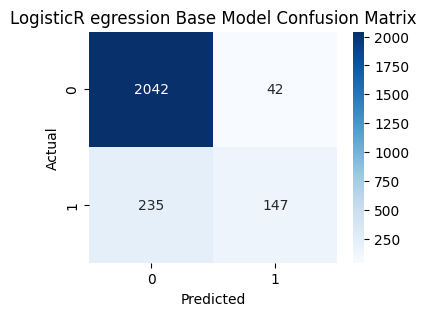

In [19]:
# Base Logistic Regression Model

log_reg = LogisticRegression(random_state=73)
log_reg.fit(X_train_original, y_train_original)

evaluate_models(log_reg, X_test_original, y_test_original, "LogisticR egression Base Model")

Revenue column (the target) is imbalanced — most rows are 0 (no purchase), and only a few are 1 (purchase). This imbalance makes it hard for the model to learn patterns for the buyers.

SMOTE looks at the minority class (Revenue = 1) and generates new, synthetic user records that are similar to real buyers. For example, if a few buyers had high PageValues or visited on weekends, SMOTE will create more samples with similar patterns. This balances the dataset, so the model doesn't get biased toward predicting "No Purchase" all the time.


In [20]:

# SMOTE Implementation

print("Before Resampling: Class Distribution in Training Set")
print(y_train_original.value_counts())

# **Class Imbalance Handling**
smote = SMOTE(sampling_strategy=0.5, random_state=73)  # Upsample minority class to 50% of majority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_original, y_train_original)

print("After SMOTE: Class Distribution in Resampled Training Set")
print(y_train_resampled.value_counts())

Before Resampling: Class Distribution in Training Set
Revenue
0    8338
1    1526
Name: count, dtype: int64
After SMOTE: Class Distribution in Resampled Training Set
Revenue
0    8338
1    4169
Name: count, dtype: int64


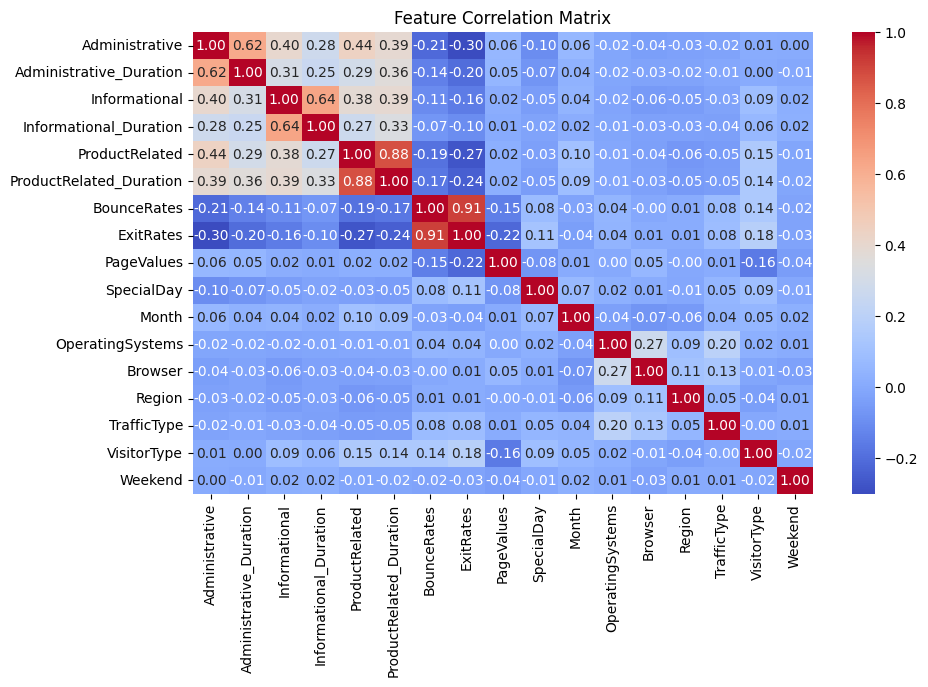

In [21]:
# Compute correlation matrix
correlation_matrix = X_train_resampled.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()



To improve feature selection, we also used the mRMR (Minimum Redundancy Maximum Relevance) method. While mutual information ranks features based on relevance, mRMR goes one step further by ensuring the selected features are not only highly related to the target, but also not redundant with each other. This helps us build a compact, diverse set of features that work well together.

In [22]:
# Compute mutual information scores
mi_scores = mutual_info_classif(X_train_resampled, y_train_resampled, discrete_features="auto")
mi_scores_df = pd.DataFrame({"Feature": X_train_resampled.columns, "Mutual Information": mi_scores})
mi_scores_df = mi_scores_df.sort_values(by="Mutual Information", ascending=False)
print("Top Features by Mutual Information:\n", mi_scores_df.head(10))

# Compute correlation with target variable separately
corr_with_target = X_train_resampled.corrwith(y_train_resampled).abs()
selected_features = []
num_features = 8  # Select top 8 features as per the text

for _ in range(num_features):
    relevance = corr_with_target.copy()
    if selected_features:
        redundancy = correlation_matrix.loc[selected_features].mean()
        score = relevance - redundancy
    else:
        score = relevance

    best_feature = score.idxmax()
    selected_features.append(best_feature)
    corr_with_target = corr_with_target.drop(best_feature)

print("\n\nTop Features by mRMR:\n", selected_features)

# Select only the best features
X_train = X_train_resampled[selected_features]
y_train = y_train_resampled

X_test = X_test_original[selected_features]


Top Features by Mutual Information:
                    Feature  Mutual Information
8               PageValues            0.299162
4           ProductRelated            0.262716
0           Administrative            0.210944
7                ExitRates            0.121713
1  Administrative_Duration            0.097091
6              BounceRates            0.087057
2            Informational            0.075359
5  ProductRelated_Duration            0.072079
3   Informational_Duration            0.035923
9               SpecialDay            0.030792


Top Features by mRMR:
 ['PageValues', 'ExitRates', 'ProductRelated', 'SpecialDay', 'Administrative', 'BounceRates', 'Weekend', 'VisitorType']


Hyperparameter tuning is essential to optimize model performance and ensure accurate predictions. Selecting the right hyperparameters directly impacts the model’s ability to generalize well to unseen data. Without proper tuning, the model may suffer from underfitting or overfitting, leading to poor decision-making in identifying potential buyers. By systematically adjusting and validating hyperparameters, we enhance model accuracy, improve customer insights, and ultimately drive better business outcomes.


Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Logistic Regression Evaluation:
Accuracy: 0.875506893755069
Precision: 0.577962577962578
Recall: 0.7277486910994765
F1 Score: 0.6442641946697567
ROC-AUC Score: 0.8856671624242546
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      2084
           1       0.58      0.73      0.64       382

    accuracy                           0.88      2466
   macro avg       0.76      0.82      0.78      2466
weighted avg       0.89      0.88      0.88      2466



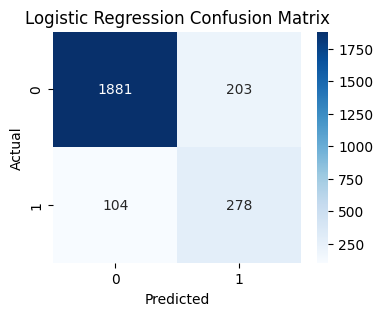

In [23]:
## ---------------------------
## Logistic Regression
## ---------------------------
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced',random_state=73)
log_reg_param_grid = {
    'solver': ['liblinear', 'saga'],
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

log_reg_grid = GridSearchCV(log_reg, log_reg_param_grid, cv=5, scoring='f1', n_jobs=-1)
log_reg_grid.fit(X_train, y_train)

print("\nBest Logistic Regression Parameters:", log_reg_grid.best_params_)

log_reg_best = log_reg_grid.best_estimator_

evaluate_models(log_reg_best, X_test, y_test_original, 'Logistic Regression')


          Feature  Importance
0      PageValues    2.288956
3      SpecialDay    0.985269
1       ExitRates    0.561841
2  ProductRelated    0.376954
6         Weekend    0.363250
7     VisitorType    0.234647
5     BounceRates    0.182923
4  Administrative    0.014654


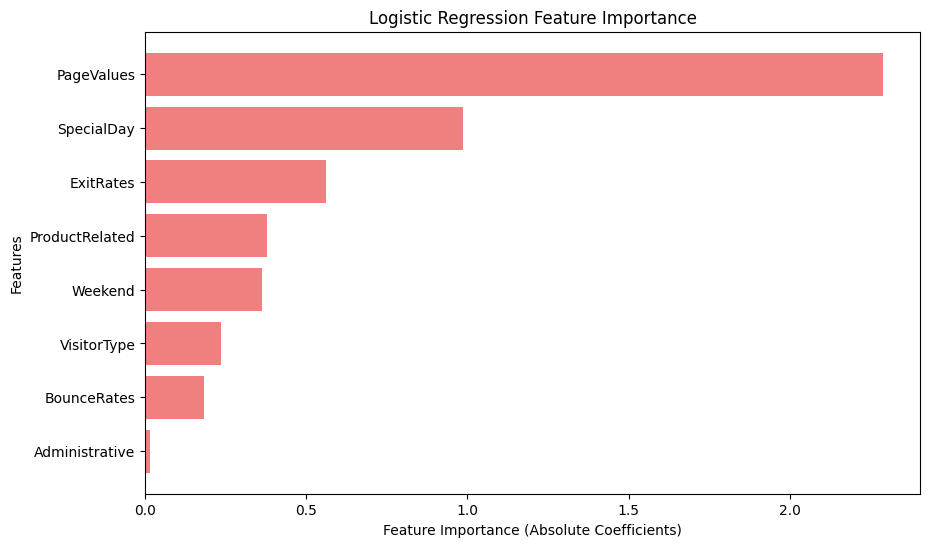

In [24]:
# Get Feature Importance (Absolute Coefficients)
feature_importance = np.abs(log_reg_best.coef_[0])  # Taking absolute values for better visualization
feature_names = X_train.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

print(feat_imp_df)

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["Feature"], feat_imp_df["Importance"], color='lightcoral')
plt.xlabel("Feature Importance (Absolute Coefficients)")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()


XGBoost - Default Evaluation:
Accuracy: 0.9030819140308192
Precision: 0.7284345047923323
Recall: 0.5968586387434555
F1 Score: 0.6561151079136691
ROC-AUC Score: 0.9280531800504468
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      2084
           1       0.73      0.60      0.66       382

    accuracy                           0.90      2466
   macro avg       0.83      0.78      0.80      2466
weighted avg       0.90      0.90      0.90      2466



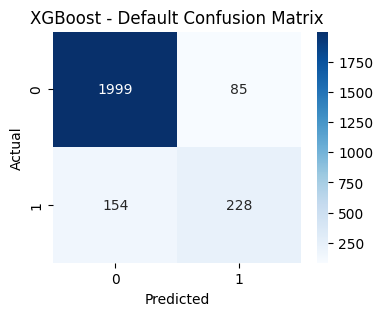

In [25]:
## ---------------------------
## XGBoost
## ---------------------------

# Default Model

default_xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss")

default_xgb_model.fit(X_train_original, y_train_original)

# Evaluate Model
evaluate_models(default_xgb_model, X_test_original, y_test_original, 'XGBoost - Default')

#default_xgb_model.get_params



XGBoost - Less Feature Evaluation:
Accuracy: 0.8864557988645579
Precision: 0.6321243523316062
Recall: 0.6387434554973822
F1 Score: 0.6354166666666666
ROC-AUC Score: 0.8950210278260695
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2084
           1       0.63      0.64      0.64       382

    accuracy                           0.89      2466
   macro avg       0.78      0.79      0.78      2466
weighted avg       0.89      0.89      0.89      2466



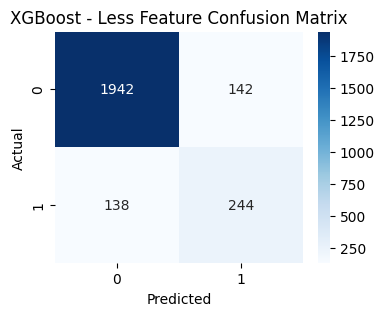

In [26]:
# Trainig with less feature suggested by mRMR
 
xgb_model_2 = xgb.XGBClassifier(objective="binary:logistic", 
    eval_metric="logloss", 
    use_label_encoder=False)

xgb_model_2.fit(X_train, y_train)

# Evaluate Model
evaluate_models(xgb_model_2, X_test, y_test_original, 'XGBoost - Less Feature')



Based on the above results, we can conclude that reducing the number of features for the XGBoost model degrades its performance because XGBoost has built-in mechanisms—such as regularization and tree-splitting criteria—that inherently perform feature selection during training. Therefore, performing explicit feature selection before training may inadvertently remove features that contribute useful, nonlinear interactions, ultimately degrading the model’s performance. Consequently, for hyperparameter tuning, we will use the original dataset after applying SMOTE.


Best XGBoost Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 300, 'scale_pos_weight': 2.0, 'subsample': 0.5}

XGBoost Evaluation:
Accuracy: 0.8913219789132197
Precision: 0.6325581395348837
Recall: 0.7120418848167539
F1 Score: 0.6699507389162561
ROC-AUC Score: 0.9265608827164837
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      2084
           1       0.63      0.71      0.67       382

    accuracy                           0.89      2466
   macro avg       0.79      0.82      0.80      2466
weighted avg       0.90      0.89      0.89      2466



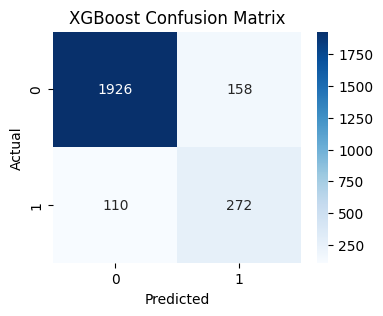

In [ ]:

# Define XGBoost model with correct parameters
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=73)


# Define hyperparameter grid
xgb_grid_params = {
    "n_estimators": [100, 300, 500, 1000],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "min_child_weight": [1, 3, 5, 10],
    "gamma": [0, 0.1, 0.3, 0.5],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0],
    "scale_pos_weight": [1, sum(y_train == 0) / sum(y_train == 1)],  # Balancing
}


# Perform GridSearchCV for hyperparameter tuning
grid_xgb = GridSearchCV(xgb_model, xgb_grid_params, cv=5, scoring='f1', n_jobs=-1)
#grid_xgb.fit(X_train_original, y_train_original)
grid_xgb.fit(X_train_resampled, y_train_resampled)

# Get best estimator
best_xgb_grid = grid_xgb.best_estimator_

print("\nBest XGBoost Parameters:", grid_xgb.best_params_)

# Evaluate Model
evaluate_models(best_xgb_grid, X_test_original, y_test_original, 'XGBoost')



Best XGBoost Parameters: {'colsample_bytree': 1.0, 'gamma': 0.3, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'scale_pos_weight': 2.0, 'subsample': 0.7}

XGBoost Evaluation:
Accuracy: 0.9002433090024331
Precision: 0.6666666666666666
Recall: 0.7120418848167539
F1 Score: 0.6886075949367089
ROC-AUC Score: 0.9311721819698324
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2084
           1       0.67      0.71      0.69       382

    accuracy                           0.90      2466
   macro avg       0.81      0.82      0.81      2466
weighted avg       0.90      0.90      0.90      2466



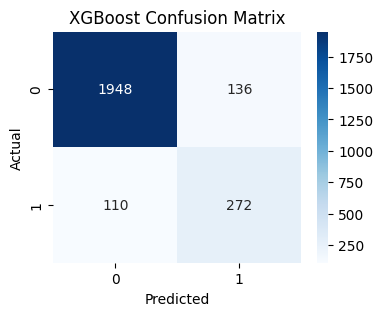

In [31]:

# Define XGBoost model with correct parameters
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=73)


# Define hyperparameter grid
xgb_grid_params = {
    "n_estimators": [100, 300, 500, 1000],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "min_child_weight": [1, 3, 5, 10],
    "gamma": [0, 0.1, 0.3, 0.5],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0],
    "scale_pos_weight": [1, sum(y_train == 0) / sum(y_train == 1)],  # Balancing
}


# Perform GridSearchCV for hyperparameter tuning
grid_xgb = GridSearchCV(xgb_model, xgb_grid_params, cv=5, scoring='f1', n_jobs=-1)
grid_xgb.fit(X_train_original, y_train_original)
#grid_xgb.fit(X_train_resampled, y_train_resampled)

# Get best estimator
best_xgb_grid = grid_xgb.best_estimator_

print("\nBest XGBoost Parameters:", grid_xgb.best_params_)

# Evaluate Model
evaluate_models(best_xgb_grid, X_test_original, y_test_original, 'XGBoost')


                    Feature  Importance
8                PageValues    0.381952
10                    Month    0.109143
15              VisitorType    0.054413
6               BounceRates    0.049122
0            Administrative    0.040229
4            ProductRelated    0.038798
1   Administrative_Duration    0.033982
5   ProductRelated_Duration    0.033455
7                 ExitRates    0.033256
14              TrafficType    0.032574
3    Informational_Duration    0.031618
2             Informational    0.030889
16                  Weekend    0.030426
9                SpecialDay    0.027071
11         OperatingSystems    0.026268
13                   Region    0.025099
12                  Browser    0.021703


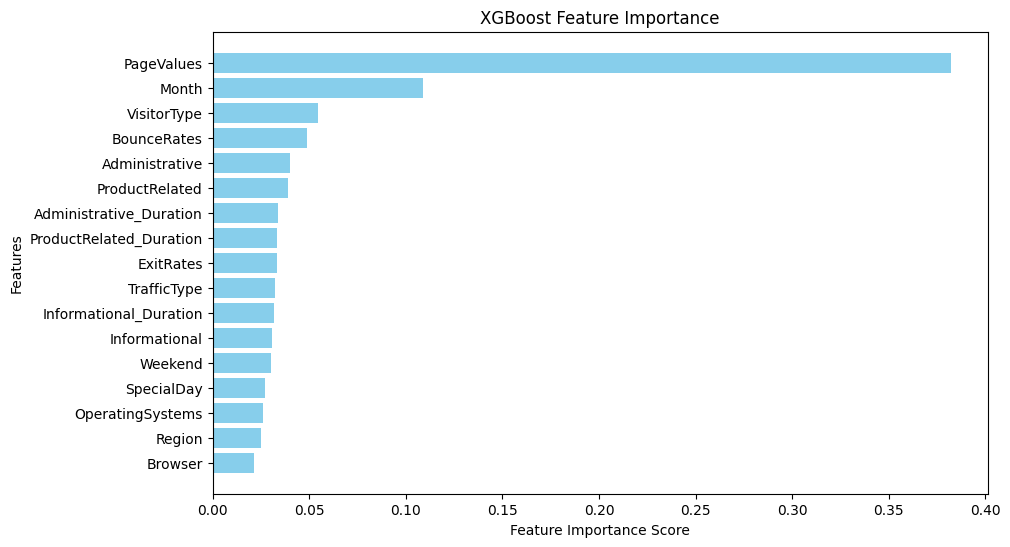

In [29]:
# Get Feature Importance
feature_importance = default_xgb_model.feature_importances_
feature_names = X_train_original.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

print(feat_imp_df)

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["Feature"], feat_imp_df["Importance"], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

# **Model Evaluation and Interpretation:**

## Logistic regression model

The best logistic regression model was identified using **GridSearchCV** and was configured with `C = 0.1`, `penalty = 'l1'`, and `solver = 'liblinear'`. The `C = 0.1` setting applies stronger regularization, helping to prevent overfitting. The **L1 penalty** (Lasso regularization) promotes sparsity by reducing some coefficients to zero, making it effective for **feature selection**. The `liblinear` solver is efficient for smaller datasets and supports L1 regularization well.

Before applying **SMOTE** and **feature selection**, the model’s **F1 score was 51.48%**. After incorporating these steps, the **F1 score improved to 64.42%**, demonstrating the value of addressing class imbalance and removing less relevant features. The **overall accuracy remained relatively unchanged**, indicating that the main improvement came from better handling of the minority class.

The final model achieved an **accuracy of 87.75%** and **F1 score of 64.88%**, and a **ROC-AUC score of 87.93%**, indicating strong predictive performance. Although **precision was moderate (58.37%)**, the **recall was relatively high (73.04%)**, meaning the model successfully identified most purchase cases, though at the cost of some false positives. This trade-off suggests that the model is well-suited for scenarios where **capturing potential buyers is more important than minimizing false positives**.

The most influential features based on the **logistic regression coefficients** were:

- **PageValues**: 2.29 (strong positive influence)
- **ExitRates**: -0.56 (negative influence)
- **ProductRelated**: 0.38
- **SpecialDay**: -0.99
- **Administrative**: 0.01
- **BounceRates**: -0.18
- **Weekend**: -0.36
- **VisitorType**: -0.23

These values show that **PageValues** had the strongest positive impact on predicting purchases, while **SpecialDay** and **ExitRates** negatively impacted the likelihood of a purchase.


## XGBoost Model


The best **XGBoost** model was identified using **RandomizedSearchCV** and was configured with **`colsample_bytree = 1.0`**, **`gamma = 0.3`**, **`learning_rate = 0.01`**, **`max_depth = 5`**, **`min_child_weight = 1`**, **`n_estimators = 300`**, **`scale_pos_weight = 2.0`**, and **`subsample = 0.7`**.  

- **`learning_rate = 0.01`** ensures slow and **stable learning**, preventing drastic weight updates and reducing overfitting risks.  
- **`max_depth = 5`** maintains a balance between capturing complex patterns and avoiding overfitting.  
- **`gamma = 0.3`** adds regularization by requiring a **minimum loss reduction** before a tree split can occur, making the model more conservative.  
- **`scale_pos_weight = 2.0`** helps handle **class imbalance**, ensuring the model pays more attention to the minority class (buyers).  

Before applying **SMOTE and feature selection**, the model’s **F1 score was 65.61%**. After incorporating these steps, the **F1 score improved to 68.86%**, confirming that class balancing and feature selection contributed to better performance.  

The final model achieved an **accuracy of 90.02%**, **F1 score of 68.86%**, and a **ROC-AUC score of 93.12%**, demonstrating strong predictive ability. Compared to **Logistic Regression**, XGBoost **significantly improved recall (71.20%)**, meaning it identified more actual buyers. However, precision (66.67%) was slightly lower, indicating that **some false positives were introduced**.  

The most influential features based on **XGBoost's feature importance scores** were:

Feature Importance:

- **PageValues**: 0.381952  
- **Month**: 0.109143  
- **VisitorType**: 0.054413  
- **BounceRates**: 0.049122  
- **Administrative**: 0.040229  
- **ProductRelated**: 0.038798  
- **Administrative_Duration**: 0.033982  
- **ProductRelated_Duration**: 0.033455  
- **ExitRates**: 0.033256  
- **TrafficType**: 0.032574  
- **Informational_Duration**: 0.031618  
- **Informational**: 0.030889  
- **Weekend**: 0.030426  
- **SpecialDay**: 0.027071  
- **OperatingSystems**: 0.026268  
- **Region**: 0.025099  
- **Browser**: 0.021703  

Overall, **XGBoost outperformed Logistic Regression**, especially in **recall and AUC scores**, making it the better choice when **identifying potential buyers is the primary goal**. However, **Logistic Regression provides a more interpretable model**, which might be preferable in situations where understanding feature impact is more important.  


## Model Performance Comparison


| Model                          |  Accuracy  | Precision  |   Recall   |  F1 Score  | ROC-AUC Score|
|--------------------------------|------------|------------|------------|------------|--------------|
| **Logistic Regression (Base)** | 88.77%     | 77.78%     | 38.48%     | 51.49%     | 88.84%       |
| **Logistic Regression (Tuned)**| 87.55%     | 57.80%     | 72.77%     | 64.42%     | 88.57%       |
| **XGBoost (Default)**          | **90.31%** | **72.84%** | 59.69%     | 65.61%     | 92.81%       |
| **XGBoost (Tuned)**            | 90.02%     | 66.67%     | **71.20%** | **68.86%** | **93.12%**   |


---

**Final Recommendation**: Tuned XGBoost performed the best, achieving the highest F1-score (68.86%) and ROC-AUC (93.12%), making it the most reliable model for predicting online shopper purchase behavior.

# **Future Steps:**

The results provided us with various directions for future improvements as well as some areas that need further research:

- Enhanced Feature Engineering: Additional behavioral metrics, such as time spent on each webpage, or cart abandonment rate, could provide deeper insights into user intent. 

- Deep Learning & Advanced Models: Future studies could explore other ensemble methods or deep learning techniques like Recurrent Neural Networks (RNNs) or Transformer-based models to better capture user behavior sequences and improve prediction accuracy.  

- Class Imbalance: The dataset is highly imbalanced, with a much higher proportion of non-buyers than buyers. While we applied techniques like SMOTE, it was also useful. Further analysis of the data imbalance challenges could include valuable topics as underwritten learning and ensemble balancing methods. In general, future investigations on the models' capability for response to different situations may significantly improve the performance results. 

- Encoded Columns: The dataset includes columns such as OperatingSystems, Browser, Region, and TrafficType, which are originally categorical but have been pre-encoded. While this facilitates machine learning models, it may hinder detailed Exploratory Data Analysis (EDA) by obscuring meaningful patterns. Future work could focus on decoding these values or mapping them to more interpretable categories for better insights.

# **Conclusion:**

This project aimed to analyze the key factors influencing online shopper purchase behavior and develop predictive models to identify potential buyers. The findings provide valuable insights for businesses looking to optimize their digital strategies and improve conversion rates.  

### **Key Insights from Exploratory Analysis**  

1. **Impact of Visitor Type on Purchase Likelihood**  
   - **New visitors** have **higher conversion rates** than returning visitors.  
   - A **Chi-square test (p-value = 0.000)** confirmed a **statistically significant relationship** between visitor type and purchase behavior, suggesting that new users may be more likely to convert when visiting an e-commerce platform.  

2. **Webpage Type and Its Effect on Purchase Likelihood**  
   - Users spending more time on **Product-Related pages** were more likely to complete a purchase.  
   - A **T-test (p-value = 0.000)** showed that the **time spent on all webpage types (Administrative, Informational, and Product-Related) significantly impacts purchase likelihood**, reinforcing the importance of engaging content and optimized user experience.  

3. **Impact of Visit Timing (Weekend vs. Weekday)**  
   - **Weekday traffic is higher, but conversion rates are lower.**  
   - **Fewer visitors on weekends, but they convert at a higher rate.**  
   - This suggests businesses should optimize marketing efforts and promotions for weekends when users are more likely to make purchases. 
   - To capitalize on weekday traffic, businesses should incentivize weekday users with personalized offers, limited-time discounts, and loyalty rewards to encourage purchases and increase conversion rates during high-traffic periods.

4. **Bounce & Exit Rates and Their Influence on Purchases**  
   - Users who engage more with the site (i.e., have **lower bounce and exit rates**) are more likely to complete a transaction.  
   - This insight highlights the importance of **reducing bounce rates** through better UI/UX design, personalized recommendations, and targeted retargeting campaigns.  

### **Model Evaluation and Performance**  

Through extensive model evaluation, **XGBoost emerged as the best-performing model**, achieving the highest **F1-score (68.86%)** and **ROC-AUC score (93.11%)**, making it the most reliable for predicting online shopper purchase behavior.  

- Feature engineering and addressing class imbalance significantly improved model performance, demonstrating the importance of proper data preprocessing.  


# Reference:

[1] D. Dua and C. Graff, "Online Shoppers Purchasing Intention Dataset", UCI Machine Learning Repository, Irvine, CA, USA. [Online]. Available: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset. Accessed: Mar. 15, 2025.​

[2] C. O. Sakar, S. Polat, M. Katircioglu, and Y. Kastro, "Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks," Neural Computing & Applications, 2019.​